In [1]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [22]:
conda install numpy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - numpy


The following packages will be UPDATED:

  conda              conda-forge::conda-22.11.1-py39hcbf53~ --> pkgs/main::conda-22.11.1-py39haa95532_4 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [23]:
conda install -c anaconda scipy

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [24]:
pip install -U scikit-learn

     ---------------------------------------- 8.3/8.3 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge boruta_py

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install boruta

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from boruta import BorutaPy
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [5]:
#set display max column to see all column
pd.set_option("display.max_columns", None)
pd.get_option("display.max_columns")

#set display max column to see all column
pd.set_option("display.max_rows", 150)
pd.get_option("display.max_rows")

150

In [6]:
app_train = pd.read_csv(r'C:\Users\Admin\Documents\GitHub\CreditRiskML2\data/loan1.csv')

In [7]:
featurenames =    ['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit', 'Purpose	Credit_Amount', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Age_years', 'Concurrent_Credits', 'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker']

In [8]:
app_train.tail()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
995,0,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1
999,0,1,30,2,2,6350,5,5,4,3,1,4,2,31,3,2,1,3,1,1,1


In [9]:
app_train["Payment_Status_of_Previous_Credit"].value_counts()


2    530
4    293
3     88
1     49
0     40
Name: Payment_Status_of_Previous_Credit, dtype: int64

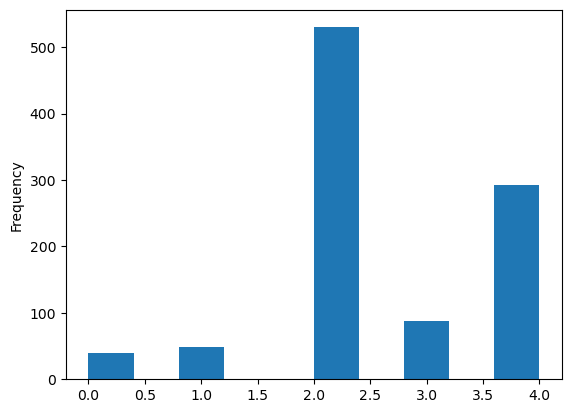

In [10]:
app_train['Payment_Status_of_Previous_Credit'].astype(int).plot.hist();

In [11]:
print(app_train.dtypes)

Creditability                        int64
Account_Balance                      int64
Duration_of_Credit_monthly           int64
Payment_Status_of_Previous_Credit    int64
Purpose                              int64
Credit_Amount                        int64
Value_Savings_Stocks                 int64
Length_of_current_employment         int64
Instalment_per_cent                  int64
Sex_Marital_Status                   int64
Guarantors                           int64
Duration_in_Current_address          int64
Most_valuable_available_asset        int64
Age_years                            int64
Concurrent_Credits                   int64
Type_of_apartment                    int64
No_of_Credits_at_this_Bank           int64
Occupation                           int64
No_of_dependents                     int64
Telephone                            int64
Foreign_Worker                       int64
dtype: object


In [12]:
#looking for broken data
app_train.describe()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [13]:
featurenames =    ['Creditability','Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit',  'Credit_Amount', 'Value_Savings_Stocks',  'Length_of_current_employment',
   'Most_valuable_available_asset', 'Age_years', 'No_of_Credits_at_this_Bank', 'Occupation', 'Foreign_Worker']

In [14]:
def yfromX(X):
    y = X['Creditability'] + X['Duration_of_Credit_monthly']**2 + np.sin(3 * X['Account_Balance']) + (X['Payment_Status_of_Previous_Credit'] * X['Credit_Amount'] * X['Age_years'])
    return y

In [15]:
# creating xy
np.random.seed(0)

X = pd.DataFrame(np.random.normal(size = (20000, len(featurenames))), columns = featurenames)
y = yfromX(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [21]:
from boruta import BorutaPy
##Data that is important
importantstuff = list(X.columns[boruta.support_])
print(f"stuff that is important: {importantstuff}")
##Data that is important but not confirmed
maybeimportant = list(X.columns[BorutaPy.support_weak_])
print(f"stuff that might be important: {maybeimportant}")
##Just garbage...
uselessstuff = list(X.columns[~(BorutaPy.support_ | BorutaPy.support_weak_)])
print(f"stuff that is just useless: {uselessstuff}")

AttributeError: module 'boruta.boruta' has no attribute 'support_'

In [25]:
np.random.seed(0)

X = pd.DataFrame(np.random.normal(size = (20000, len(featurenames))), columns = featurenames)
y = yfromX(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [26]:
#need to chose estimator obv
estimator = RandomForestRegressor()

In [27]:
# Find correlation with the target and sort
correlations = app_train.corr()['Creditability'].sort_values()

# Display correlations
print('Postive Correlations:\n', correlations.tail(15))
print('\nNegative Correlations:\n', correlations.head(15))

Postive Correlations:
 Duration_in_Current_address         -0.002967
No_of_dependents                     0.003015
Type_of_apartment                    0.018119
Guarantors                           0.025137
Telephone                            0.036466
No_of_Credits_at_this_Bank           0.045732
Foreign_Worker                       0.082079
Sex_Marital_Status                   0.088184
Age_years                            0.091272
Concurrent_Credits                   0.109844
Length_of_current_employment         0.116002
Value_Savings_Stocks                 0.178943
Payment_Status_of_Previous_Credit    0.228785
Account_Balance                      0.350847
Creditability                        1.000000
Name: Creditability, dtype: float64

Negative Correlations:
 Duration_of_Credit_monthly      -0.214927
Credit_Amount                   -0.154740
Most_valuable_available_asset   -0.142612
Instalment_per_cent             -0.072404
Occupation                      -0.032735
Purpose         

In [ ]:
#object n stuff
boruta = BorutaPy(estimator = estimator, n_estimators = 'auto', max_iter = 100)
boruta.fit(np.array(X_train), np.array(y_train))

In [ ]:
app_train_selected = app_train[['Duration_in_Current_address', 'No_of_dependents', 'Type_of_apartment', 'Guarantors', 'Telephone', 'No_of_Credits_at_this_Bank', 'Foreign_Worker', 'Sex_Marital_Status', 'Age_years', 'Concurrent_Credits', 'Length_of_current_employment', 'Value_Savings_Stocks', 'Payment_Status_of_Previous_Credit', 'Account_Balance']]

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = .3, random_state = 10)

In [ ]:

new_rf = RandomForestRegressor(n_jobs = -1, max_depth = 5)

boruta_selector = BorutaPy(new_rf, n_estimators = 'auto', random_state = 0)
boruta_selector.fit(np.array(X_train), np.array(y_train))

boruta_ranking = boruta_selector.ranking_
selected_features = np.array(featurenames)[boruta_ranking <= 2]

In [ ]:
boruta_ranking = pd.DataFrame(data=boruta_ranking, index=X_train.columns.values, columns=['values'])
boruta_ranking['Variable'] = boruta_ranking.index
boruta_ranking.sort_values(['values'], ascending=True, inplace=True)

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x='values',y='Variable',data=boruta_ranking, color='b')
plt.title('Boruta Feature Ranking')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
# The output from Boruta is a ranking number (Rank 1: confirmed, Rank 2: moderate influence, Above Rank 3: Rejected). 
# As a result, we can group them according to need. Every attribute with a rank of 1 denotes a verified impact on the target variable (creditability). 
# A rating of 2 implies some influence. Anything over 3 can be disregarded because it has no influence.
# We selected all the appropriate dependent variables using Boruta, and we eliminated the noise.
# Boruta can be a very effective tool for comparing the relevance of features using traditional approaches.